## Predicting NBA players' scoring average in Playoffs using Machine Learning.
In this notebook, I am going to go through an example machine learning project with the goal of predicting the scoring average of players

Problem definition How well can we predict the scoring of each player given its characteristics and categories provided by Kaggle.

Data The data was adapted from that of Data from Basketball Reference. https://www.kaggle.com/datasets/vivovinco/nba-player-stats

There is 2 dataset:

2021-2022 NBA Player Stats Regular Season CSV 2021-2022 NBA Player Stats Playoff CSV

Evaluation The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted the scoring Per Average.

For more on the evaluation of this project check: https://www.kaggle.com/datasets/vivovinco/nba-player-stats

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

Features

* Rk : Rank
* Player : Player's name
* Pos : Position
* Age : Player's age
* Tm : Team
* G : Games played
* GS : Games started
* MP : Minutes played per game
* FG : Field goals per game
* FGA : Field goal attempts per game
* FG% : Field goal percentage
* 3P : 3-point field goals per game
* 3PA : 3-point field goal attempts per game
* 3P% : 3-point field goal percentage
* 2P : 2-point field goals per game
* 2PA : 2-point field goal attempts per game
* 2P% : 2-point field goal percentage
* eFG% : Effective field goal percentage
* FT : Free throws per game
* FTA : Free throw attempts per game
* FT% : Free throw percentage
* ORB : Offensive rebounds per game
* DRB : Defensive rebounds per game
* TRB : Total rebounds per game
* AST : Assists per game
* STL : Steals per game
* BLK : Blocks per game
* TOV : Turnovers per game
* PF : Personal fouls per game
* PTS : Points per game

In [55]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Specify the encoding parameter when reading the CSV file
df = pd.read_csv("2021_2022_NBA_PlayerStats_Playoffs.csv", encoding='latin1', sep=";")

In [3]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,20,MEM,10,1,16.8,2.3,5.2,...,0.923,0.4,1.2,1.6,0.5,0.5,0.0,0.2,1.4,6.9
213,214,Delon Wright,SG,29,ATL,5,0,27.4,3.0,5.8,...,0.667,2.2,2.6,4.8,2.8,0.8,0.2,1.0,0.4,8.2
214,215,Thaddeus Young,PF,33,TOR,6,0,14.5,1.5,3.0,...,0.250,1.2,1.8,3.0,1.7,0.8,0.2,0.5,1.3,3.3
215,216,Trae Young,PG,23,ATL,5,5,37.2,4.4,13.8,...,0.788,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int64  
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int64  
 4   Tm      217 non-null    object 
 5   G       217 non-null    int64  
 6   GS      217 non-null    int64  
 7   MP      217 non-null    float64
 8   FG      217 non-null    float64
 9   FGA     217 non-null    float64
 10  FG%     217 non-null    float64
 11  3P      217 non-null    float64
 12  3PA     217 non-null    float64
 13  3P%     217 non-null    float64
 14  2P      217 non-null    float64
 15  2PA     217 non-null    float64
 16  2P%     217 non-null    float64
 17  eFG%    217 non-null    float64
 18  FT      217 non-null    float64
 19  FTA     217 non-null    float64
 20  FT%     217 non-null    float64
 21  ORB     217 non-null    float64
 22  DR

In [58]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3


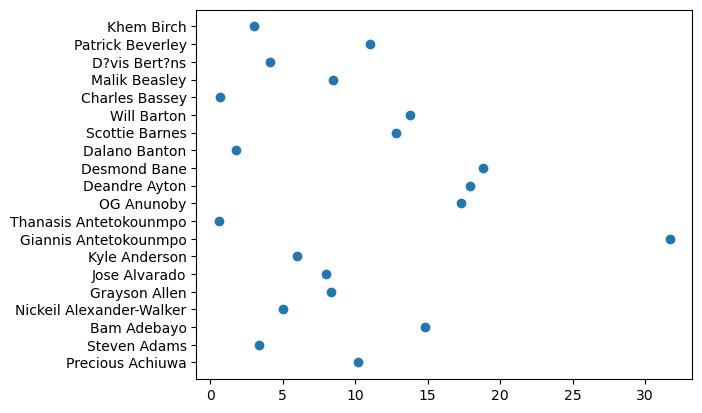

In [59]:
fig, ax = plt.subplots()
ax.scatter(df["PTS"][:20], df["Player"][:20])

<Axes: ylabel='Frequency'>

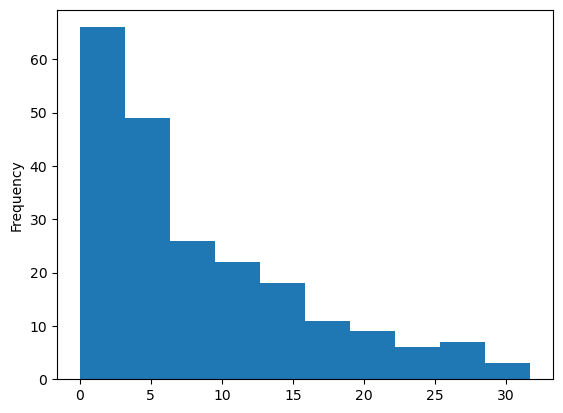

In [60]:
df.PTS.plot.hist()

In [61]:
df.corr(numeric_only=True)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.071221,0.111308,-0.030057,-0.088309,-0.135540,-0.097911,-0.106281,-0.029020,0.001075,...,-0.033272,-0.013436,-0.100683,-0.082090,-0.028585,-0.016249,0.002716,-0.044341,-0.081010,-0.127234
Age,-0.071221,1.000000,0.077664,0.168837,0.156182,0.058346,0.061334,0.002627,0.069386,0.055826,...,0.105809,0.109697,0.137526,0.141481,0.147664,0.071371,0.038431,0.078740,0.190161,0.051665
G,0.111308,0.077664,1.000000,0.605852,0.314688,0.262045,0.250995,0.128068,0.308627,0.287861,...,0.310818,0.157864,0.255553,0.245329,0.211989,0.219192,0.203579,0.150694,0.251093,0.262793
GS,-0.030057,0.168837,0.605852,1.000000,0.675837,0.606850,0.601870,0.114232,0.519327,0.519478,...,0.263895,0.366554,0.570387,0.552797,0.513011,0.490932,0.397581,0.471150,0.545702,0.604630
MP,-0.088309,0.156182,0.314688,0.675837,1.000000,0.870614,0.884608,0.150133,0.723883,0.764719,...,0.511373,0.459740,0.764039,0.730577,0.754464,0.695467,0.521649,0.743963,0.821647,0.879836
FG,-0.135540,0.058346,0.262045,0.606850,0.870614,1.000000,0.969793,0.227012,0.680660,0.718521,...,0.436796,0.444158,0.775154,0.734624,0.747050,0.623404,0.465242,0.782127,0.675322,0.990097
FGA,-0.097911,0.061334,0.250995,0.601870,0.884608,0.969793,1.000000,0.090198,0.730467,0.808555,...,0.439355,0.371765,0.736924,0.683338,0.792657,0.641146,0.415937,0.809911,0.666505,0.974707
FG%,-0.106281,0.002627,0.128068,0.114232,0.150133,0.227012,0.090198,1.000000,0.046010,-0.039100,...,0.109069,0.229966,0.185721,0.212895,0.053067,0.128982,0.223619,0.064907,0.148381,0.191054
3P,-0.029020,0.069386,0.308627,0.519327,0.723883,0.680660,0.730467,0.046010,1.000000,0.947846,...,0.406689,0.039870,0.406982,0.328724,0.586919,0.518062,0.277225,0.558651,0.543202,0.718156
3PA,0.001075,0.055826,0.287861,0.519478,0.764719,0.718521,0.808555,-0.039100,0.947846,1.000000,...,0.420575,0.071543,0.453570,0.374126,0.655335,0.552334,0.263174,0.621990,0.566200,0.751398


In [62]:
df.PTS.head(30)

0     10.2
1      3.4
2     14.8
3      5.0
4      8.3
5      8.0
6      6.0
7     31.7
8      0.6
9     17.3
10    17.9
11    18.8
12     1.8
13    12.8
14    13.8
15     0.7
16     8.5
17     4.1
18    11.0
19     3.0
20     2.8
21     2.9
22    14.3
23    18.0
24     2.0
25    23.3
26    11.2
27     5.0
28    13.3
29     0.0
Name: PTS, dtype: float64

## Make a copy of the original DataFrame
Since I am going to be manipulating the data, I'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [63]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [64]:
# Check the different values of different columns
df_tmp.Age.value_counts()

24    21
29    20
25    20
22    19
23    18
26    17
27    15
28    13
21    12
31    11
33    10
32    10
20     7
30     7
35     7
34     3
19     3
36     3
38     1
Name: Age, dtype: int64

## 5. Modelling
Knowing the evaluation metric I am heading towards. I could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what I'll do instead is use a machine learning model to help me do EDA.

Following the https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html learning map, we find a https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor might be a good candidate.

In [65]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int64  
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int64  
 4   Tm      217 non-null    object 
 5   G       217 non-null    int64  
 6   GS      217 non-null    int64  
 7   MP      217 non-null    float64
 8   FG      217 non-null    float64
 9   FGA     217 non-null    float64
 10  FG%     217 non-null    float64
 11  3P      217 non-null    float64
 12  3PA     217 non-null    float64
 13  3P%     217 non-null    float64
 14  2P      217 non-null    float64
 15  2PA     217 non-null    float64
 16  2P%     217 non-null    float64
 17  eFG%    217 non-null    float64
 18  FT      217 non-null    float64
 19  FTA     217 non-null    float64
 20  FT%     217 non-null    float64
 21  ORB     217 non-null    float64
 22  DR

In [66]:
# Check for missing values
df_tmp.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

## Convert strings to categories
One way to help turn all of the data into numbers is to convert the columns with the string datatype into a category datatype.

To do this I can use the pandas types API which allows me to interact and manipulate the types of data.

In [67]:
df_tmp.tail().T

,212,213,214,215,216
Rk,213,214,215,216,217
Player,Ziaire Williams,Delon Wright,Thaddeus Young,Trae Young,Omer Yurtseven
Pos,SF,SG,PF,PG,C
Age,20,29,33,23,23
Tm,MEM,ATL,TOR,ATL,MIA
G,10,5,6,5,9
GS,1,0,0,5,0
MP,16.8,27.4,14.5,37.2,4.2
FG,2.3,3.0,1.5,4.4,1.3
FGA,5.2,5.8,3.0,13.8,2.0


In [68]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Player
Pos
Tm


In [72]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [84]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [74]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [75]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Rk      217 non-null    int64   
 1   Player  217 non-null    category
 2   Pos     217 non-null    category
 3   Age     217 non-null    int64   
 4   Tm      217 non-null    category
 5   G       217 non-null    int64   
 6   GS      217 non-null    int64   
 7   MP      217 non-null    float64 
 8   FG      217 non-null    float64 
 9   FGA     217 non-null    float64 
 10  FG%     217 non-null    float64 
 11  3P      217 non-null    float64 
 12  3PA     217 non-null    float64 
 13  3P%     217 non-null    float64 
 14  2P      217 non-null    float64 
 15  2PA     217 non-null    float64 
 16  2P%     217 non-null    float64 
 17  eFG%    217 non-null    float64 
 18  FT      217 non-null    float64 
 19  FTA     217 non-null    float64 
 20  FT%     217 non-null    float64 
 21  ORB     217 non-

In [76]:
# Save preprocessed data
df_tmp.to_csv("NBA_data_playoff_train_tmp.csv",
              index=False)

In [77]:
# Import preprocessed data
df_tmp = pd.read_csv("NBA_data_playoff_train_tmp.csv",
                     low_memory=False)
df_tmp.tail().T

,212,213,214,215,216
Rk,213,214,215,216,217
Player,Ziaire Williams,Delon Wright,Thaddeus Young,Trae Young,Omer Yurtseven
Pos,SF,SG,PF,PG,C
Age,20,29,33,23,23
Tm,MEM,ATL,TOR,ATL,MIA
G,10,5,6,5,9
GS,1,0,0,5,0
MP,16.8,27.4,14.5,37.2,4.2
FG,2.3,3.0,1.5,4.4,1.3
FGA,5.2,5.8,3.0,13.8,2.0


## The processed DataFrame has the columns I added to it but it's still missing values.

In [85]:
# Check missing values
df_tmp.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [86]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Rk
Age
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


In [87]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [88]:
df_tmp

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,20,MEM,10,1,16.8,2.3,5.2,...,0.923,0.4,1.2,1.6,0.5,0.5,0.0,0.2,1.4,6.9
213,214,Delon Wright,SG,29,ATL,5,0,27.4,3.0,5.8,...,0.667,2.2,2.6,4.8,2.8,0.8,0.2,1.0,0.4,8.2
214,215,Thaddeus Young,PF,33,TOR,6,0,14.5,1.5,3.0,...,0.250,1.2,1.8,3.0,1.7,0.8,0.2,0.5,1.3,3.3
215,216,Trae Young,PG,23,ATL,5,5,37.2,4.4,13.8,...,0.788,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4


The data is numeric and there are no missing values, I should be able to build a machine learning model.

Let's reinstantiate the RandomForestRegressor.

This will take a few minutes which is too long for interacting with it. So what I'll do is create a subset of rows to work with.

In [89]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1        

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("PTS", axis=1), df_tmp.PTS)

CPU times: user 203 ms, sys: 79.7 ms, total: 283 ms
Wall time: 132 ms


RandomForestRegressor(n_jobs=-1)